In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# === Read files ===
#file1 = "/mnt/c/Users/canto/Repositories/RCFM/imported-data/data_MWMcGaughGAIA.csv"
file1 = "/mnt/c/Users/canto/Repositories/RCFM/imported-data/data_XueSofueGaia.csv"
file2 = "/mnt/c/Users/canto/Repositories/RCFM/TSet (L and Reff) - Sheet1.csv"

In [24]:
# Read the first file
df1 = pd.read_csv(file1)
df1.head(5)

,Galaxy,chi_square,alpha,disk_scale,bulge_scale,phi_zero
0,CamB_rotmod,0.225410,24989.206070,0.000014,1.0,0.000005
1,D564-8_rotmod,0.106537,4130.354851,1.211034,1.0,0.000004
2,D631-7_rotmod,0.302208,2721.188111,0.265668,1.0,0.000006
3,DDO154_rotmod,10.581347,1567.145639,1.185040,1.0,0.000005
4,DDO168_rotmod,4.364095,1290.705771,0.763552,1.0,0.000005


In [25]:
# Read the second file
df2 = pd.read_csv(file2, skiprows=1)  # skips the first two empty rows
df2.head(4)

,Galaxy,Total Luminocity at [3.6] units of 10+9solLum,Reff (kpc) half light radius at [3.6]
0,CamB_rotmod,0.075,1.21
1,D564-8_rotmod,0.033,0.72
2,D631-7_rotmod,0.196,1.22
3,DDO154_rotmod,0.053,0.65


In [26]:
# === Merge on 'Galaxy' ===
merged = pd.merge(df1, df2, on="Galaxy")

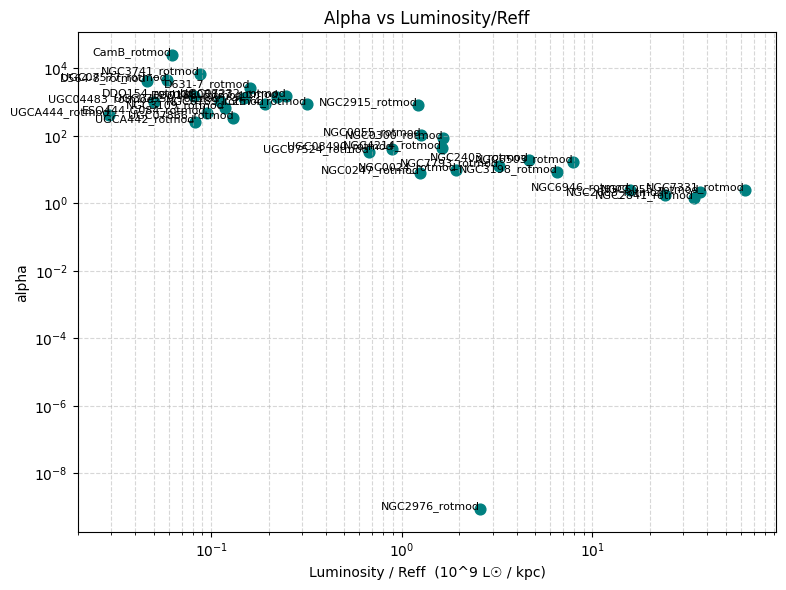

In [27]:
# === Compute L / Reff ===
merged["L_over_Reff"] = merged["Total Luminocity at [3.6] units of 10+9solLum"] / merged["Reff (kpc) half light radius at [3.6]"]

# === Plot ===
plt.figure(figsize=(8,6))
plt.scatter(merged["L_over_Reff"], merged["alpha"], color="teal", s=60)

plt.xscale("log")  # optional, often helpful if range is large
plt.yscale("log")  # optional
plt.xlabel("Luminosity / Reff  (10^9 L☉ / kpc)")
plt.ylabel("alpha")
plt.title("Alpha vs Luminosity/Reff")
plt.grid(True, which="both", ls="--", alpha=0.5)

for _, row in merged.iterrows():
    plt.text(row["L_over_Reff"], row["alpha"], row["Galaxy"], fontsize=8, ha="right")

plt.tight_layout()
plt.show()


In [28]:
!pip list

Package                   Version
------------------------- -----------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.3.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.4
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.60.1
fqdn                      1.5.1
h11                       0.16.0
httpcore                  1.0.9
httpx                     0.28.1
idna                      3.11
ipykernel                 7.1.0
ipython          